# Drug review using Decision Tree

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("drug200.csv", delimiter=',')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [4]:
# Dimension of the dataset
df.shape

(200, 6)

In [5]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

## Data Cleaning 

In [6]:
# Checking for null values
for column in df.columns:
    print(column, ", n(missing values) = ", df[column].isnull().sum()*100/len(df), ", n unique values = ", df[column].nunique())
    print('')

Age , n(missing values) =  0.0 , n unique values =  57

Sex , n(missing values) =  0.0 , n unique values =  2

BP , n(missing values) =  0.0 , n unique values =  3

Cholesterol , n(missing values) =  0.0 , n unique values =  2

Na_to_K , n(missing values) =  0.0 , n unique values =  198

Drug , n(missing values) =  0.0 , n unique values =  5



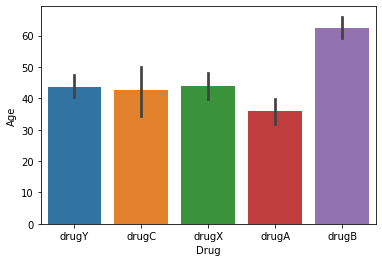

In [7]:
sns.barplot(df['Drug'], df['Age'])
plt.show()

In [8]:
df['Sex'].value_counts().to_frame()

,Sex
M,104
F,96


In [9]:
df['Sex'].replace(['M', 'F'], [1, 0], inplace=True)

In [10]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,drugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,drugY


In [11]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [12]:
df['BP'].replace(['HIGH', 'NORMAL', 'LOW'], [2, 1, 0], inplace=True)

In [13]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,HIGH,25.355,drugY
1,47,1,0,HIGH,13.093,drugC
2,47,1,0,HIGH,10.114,drugC
3,28,0,1,HIGH,7.798,drugX
4,61,0,0,HIGH,18.043,drugY


In [14]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [15]:
df['Cholesterol'].replace(['HIGH', 'NORMAL'], [1, 0], inplace=True)

In [16]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,drugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,drugY


### Converting Pandas DataFrame to Numpy arrays

In [17]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23.   ,  0.   ,  2.   ,  1.   , 25.355],
       [47.   ,  1.   ,  0.   ,  1.   , 13.093],
       [47.   ,  1.   ,  0.   ,  1.   , 10.114],
       [28.   ,  0.   ,  1.   ,  1.   ,  7.798],
       [61.   ,  0.   ,  0.   ,  1.   , 18.043]])

In [18]:
y = df[['Drug']].values
y[0:5]

array([['drugY'],
       ['drugC'],
       ['drugC'],
       ['drugX'],
       ['drugY']], dtype=object)

## Train-Test-Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [21]:
print("Train sets: ", X_train.shape, y_train.shape)
print("Test sets: ", X_test.shape, y_test.shape)

Train sets:  (150, 5) (150, 1)
Test sets:  (50, 5) (50, 1)


## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
drugtree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugtree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
drugtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
yhat = drugtree.predict(X_test)

## Evaluation

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
print("Decision Tree's accuracy = ", accuracy_score(y_test, yhat))

Decision Tree's accuracy =  1.0


In [28]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [ ]:
dot_data = StringIO()
filename='images/drugtree.png'
featuresNames = df.columns[0:5]
targetNames = df['Drug'].unique().tolist()
out = tree.export_graphviz(drugtree, feature_names=featuresNames, out_file=dot_data, class_names=np.unique(y_train), filled=True, special_characters=True, rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')